<a href="https://colab.research.google.com/github/Phinatech/PCA_Assignment_formative/blob/main/Template_PCA_Formative_1%5BPeer_Pair_Number%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Formative Assignment: Advanced Linear Algebra (PCA)
This notebook will guide you through the implementation of Principal Component Analysis (PCA). Fill in the missing code and provide the required answers in the appropriate sections. You will work with a dataset that is Africanized .

Make sure to display outputs for each code cell when submitting.

### Step 1: Load and Standardize the Data
Before applying PCA, we must standardize the dataset. Standardization ensures that all features have a mean of 0 and a standard deviation of 1, which is essential for PCA.
Fill in the code to standardize the dataset.

STRICTLY - Write code that implements standardization based on the image below

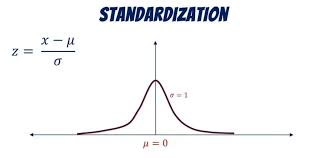


In [8]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
# Load Dataset
df = pd.read_csv('/content/Education in General.csv')

# Basic Cleaning
# Drop unnamed or empty columns
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df = df.dropna(how='all')

# Replace common missing tokens with NaN
df.replace(['#N/B', 'NA', 'N/A', 'NaN', '-', '...', 'None', ''], np.nan, inplace=True)

# --- Handle Missing Values ---
# For numeric columns, replace NaN with column mean
for col in df.select_dtypes(include=[np.number]).columns:
    df[col] = df[col].fillna(df[col].mean())

# For categorical columns, replace NaN with mode
for col in df.select_dtypes(exclude=[np.number]).columns:
    df[col] = df[col].fillna(df[col].mode()[0])

# --- Encode Categorical Columns ---
# Convert categorical data to numeric codes
for col in df.select_dtypes(exclude=[np.number]).columns:
    df[col] = df[col].astype('category').cat.codes

# --- Convert to Numpy Array ---
data = df.values

print("Dataset loaded and cleaned successfully.")
print(f"Shape: {data.shape}")
print("First 5 rows:\n", df.head())

Dataset loaded and cleaned successfully.
Shape: (756, 11)
First 5 rows:
    ISO_Code  Country  Year  \
0        13        0  2010   
1         0        1  2010   
2         4        3  2010   
3         3        4  2010   
4        11        6  2010   

   School life expectancy, primary to tertiary, male (years)  \
0                                                108           
1                                                  8           
2                                                 10           
3                                                140           
4                                                 52           

   School life expectancy, primary to tertiary, female (years)  \
0                                                102             
1                                                186             
2                                                 56             
3                                                135             
4                              

In [7]:
# Step 1: Standardize the data (use of numpy only allowed)

# Convert DataFrame to NumPy array
data = df.values

# Compute mean and std (axis=0 means column-wise)
mean = np.mean(data, axis=0)
std = np.std(data, axis=0)

# Avoid division by zero if any column has zero variance
std[std == 0] = 1

# Standardize
standardized_data = (data - mean) / std

print("Data standardized successfully.")
print("Shape:", standardized_data.shape)
print("First 5 rows:\n", standardized_data[:5])

Data standardized successfully.
Shape: (756, 11)
First 5 rows:
 [[-0.86617394 -1.70026736 -1.61245155  1.06748043  0.53054859 -0.27153733
  -0.10915591 -0.43512627 -0.56308021 -0.40193212 -0.14846619]
 [-1.70026736 -1.63610633 -1.61245155 -0.59502875  2.271915   -0.27153733
  -0.10915591 -0.43512627  1.86185507 -1.0279796  -0.998095  ]
 [-1.44362323 -1.50778426 -1.61245155 -0.56177857 -0.42305683 -0.27153733
  -0.10915591 -0.43512627 -0.56308021 -0.40193212 -0.14846619]
 [-1.50778426 -1.44362323 -1.61245155  1.59948337  1.21465682  0.03792225
   1.76318901  2.35475158  1.91185373 -0.74341256  0.07512034]
 [-0.994496   -1.31530116 -1.61245155  0.13647529  0.01228477 -0.27153733
  -0.10915591 -0.43512627 -0.56308021 -0.40193212 -0.14846619]]


### Step 3: Calculate the Covariance Matrix
The covariance matrix helps us understand how the features are related to each other. It is a key component in PCA.

In [9]:
# Calculate the Covariance Matrix

# Double-check for NaN or Inf before covariance
if np.isnan(standardized_data).any() or np.isinf(standardized_data).any():
    print("Warning: Data contains NaN or Inf. Replacing them with column means.")
    col_means = np.nanmean(standardized_data, axis=0)
    inds = np.where(np.isnan(standardized_data))
    standardized_data[inds] = np.take(col_means, inds[1])

# Compute covariance matrix
cov_matrix = np.cov(standardized_data.T)

print("Covariance matrix calculated successfully.")
print("Shape:", cov_matrix.shape)

Covariance matrix calculated successfully.
Shape: (11, 11)


### Step 4: Perform Eigendecomposition
Eigendecomposition of the covariance matrix will give us the eigenvalues and eigenvectors, which are essential for PCA.
Fill in the code to compute the eigenvalues and eigenvectors of the covariance matrix.

In [10]:
# Step 4: Perform Eigendecomposition

# Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

# Sort them in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

print("Eigendecomposition completed successfully.")
print("Eigenvalues:\n", eigenvalues)
print("Eigenvectors shape:", eigenvectors.shape)

Eigendecomposition completed successfully.
Eigenvalues:
 [2.49299825 1.90016014 1.61691798 1.03424332 0.95851333 0.86040397
 0.75315453 0.67922566 0.38053426 0.24050467 0.09791344]
Eigenvectors shape: (11, 11)


In [11]:
# Calculate explained variance ratio
explained_variance_ratio = eigenvalues / np.sum(eigenvalues)

# Calculate cumulative variance
cumulative_variance = np.cumsum(explained_variance_ratio)

print("Explained variance calculated successfully.\n")
print("Explained variance ratio (first 5):", explained_variance_ratio[:5])
print("Cumulative explained variance (first 5):", cumulative_variance[:5])

Explained variance calculated successfully.

Explained variance ratio (first 5): [0.22633642 0.17251334 0.14679811 0.09389775 0.08702231]
Cumulative explained variance (first 5): [0.22633642 0.39884976 0.54564787 0.63954562 0.72656793]


### Step 5: Sort Principal Components
Sort the eigenvectors based on their corresponding eigenvalues in descending order. The higher the eigenvalue, the more important the eigenvector.
Complete the code to sort the eigenvectors and print the sorted components.

<a url ='https://www.youtube.com/watch?v=vaF-1xUEXsA&t=17s'>How Is Explained Variance Used In PCA?'<a/>

In [ ]:
# Step 5: Sort Principal Components
sorted_indices = None  # Sort eigenvalues in descending order
sorted_eigenvectors = None  # Sort eigenvectors accordingly
sorted_eigenvectors

### Step 6: Project Data onto Principal Components
Now that we’ve selected the number of components, we will project the original data onto the chosen principal components.
Fill in the code to perform the projection.

In [ ]:
# Step 6: Project Data onto Principal Components
num_components = None  # Decide on the number of principal components to keep
reduced_data = None  # Project data onto the principal components
reduced_data[:5]

### Step 7: Output the Reduced Data
Finally, display the reduced data obtained by projecting the original dataset onto the selected principal components.

In [ ]:
# Step 7: Output the Reduced Data
print(f'Reduced Data Shape: {reduced_data.shape}')  # Display reduced data shape
reduced_data[:5]  # Display the first few rows of reduced data

### Step 8: Visualize Before and After PCA
Now, let's plot the original data and the data after PCA to compare the reduction in dimensions visually.

In [ ]:
# Step 8: Visualize Before and After PCA


# Plot original data (first two features for simplicity)


# Plot reduced data after PCA
